## <b> <span style='color:#e61227'>|</span>   **Helmet Violation Detection Using YOLOv9 and PaddleOCR**</b> 

![](https://vcdn1-sohoa.vnecdn.net/2024/10/30/helmetdetector-thiem-kth-17295-3059-7298-1730277364.png?w=680&h=0&q=100&dpr=1&fit=crop&s=2CL5NrDB8ZQ3h3v3JTgU_A)

## <b>1 <span style='color:#e61227'>|</span> Introduction</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>1.1 |</span></b> Project Objective </b></p>
</div>

The goal of this project is to **detect helmet violations** in real-time using **YOLOv9** for object detection and **PaddleOCR** for license plate recognition. The objectives include:
- Identifying motorcyclists without helmets.
- Extracting license plate information of violators.


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>1.2 |</span></b> PaddleOCR for Plate Recognition </b></p>
</div>

**PaddleOCR** is a robust optical character recognition tool known for its high accuracy in multilingual text detection and recognition. Its features include:
- Angle detection for better text alignment.
- Lightweight and fast inference.
- Easy integration with custom object detection models.


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>1.3 |</span></b> Object Detection by YOLOv9 </b></p>
</div>

**YOLOv9** is a state-of-the-art object detection algorithm optimized for speed and accuracy. It is particularly effective for detecting objects in real-time applications like **helmet violation detection**.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>1.4 |</span></b> Model Performance Trade-off for YOLOv9e </b></p>
</div>


Balancing model complexity, accuracy, and inference speed is critical. **YOLOv9e** provides an efficient configuration for detecting small objects like helmets and license plates.


## <b>2 <span style='color:#e61227'>|</span> Dataset </b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>2.1 |</span></b> Dataset Prepration For Model Tuning </b></p>
</div>

To fine-tune my pre-trained model on a specialized dataset focused on motorcycles, I prepared a dataset designed to improve its ability to accurately recognize motorcycle riders with or without helmets. The dataset includes images of motorcycle riders wearing helmets, riders without helmets, and motorcycle license plates captured from a top-view perspective. The dataset is formatted for **YOLOv9** and consists of **626** carefully annotated images.

Each image undergoes a standardization process, being resized to a uniform resolution of **640x640 pixels**. The training set includes **363** images, which were further enhanced through **data augmentation** to improve the model's generalization capabilities. The validation set contains **53** images, and after augmenting the dataset, the total number of images reached approximately **1,000**.

The dataset contains images annotated for **helmet detection** and **license plates**. Preprocessing steps include:
1. **Resizing** images to 640x640.
2. **Splitting** data into training, validation, and testing sets.
3. **Configuring** the dataset using a **YAML file**.

In [5]:
import yaml
import os

# Define the dataset_path
dataset_path = '/kaggle/input/helmet/HelmetViolationsV2'

# Set the path to the YAML file
yaml_file_path = os.path.join(dataset_path, 'data.yaml')

# Load and print the contents of the YAML file
with open(yaml_file_path, 'r') as file:
    yaml_content = yaml.load(file, Loader=yaml.FullLoader)
    print(yaml.dump(yaml_content, default_flow_style=False))

names:
- Plate
- WithHelmet
- WithoutHelmet
nc: 3
roboflow:
  license: Private
  project: helmetviolations
  url: https://app.roboflow.com/helmet-nztej/helmetviolations/2
  version: 2
  workspace: helmet-nztej
test: ../test/images
train: ../train/images
val: ../valid/images



## <b>3 <span style='color:#e61227'>|</span> Install And Import Essential Libreries </b> 

In [6]:
# Install Essential Libraries
!pip install ultralytics
!pip install paddlepaddle-gpu -f https://www.paddlepaddle.org.cn/whl/linux/mkl/paddlepaddle_gpu.html
!pip install paddleocr
from IPython import display
display.clear_output()

In [11]:
# Import Essential Libraries
import pandas as pd
from PIL import Image
import cv2
import numpy as np
import torch
from ultralytics import YOLO
from paddleocr import PaddleOCR
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
import warnings
warnings.filterwarnings('ignore')
import wandb

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

## <b>4 <span style='color:#e61227'>|</span> Loading YOLOv9e Pre-trained Model </b> 

In [12]:
# Load a pretrained YOLOv8n model from Ultralytics
Vio_Model = YOLO("yolov9e.pt")

100%|██████████| 112M/112M [00:03<00:00, 34.7MB/s] 


## <b> 5 <span style='color:#e61227'>|</span> Fine-Tuning YOLOv9e By Hyperparameters Tuning and Using Customized Dataset </b> 

In [13]:
#Train the model on our custom dataset
yaml_file_path = '/kaggle/input/helmet/HelmetViolationsV2/data.yaml'
results = Vio_Model.train( data= yaml_file_path, epochs=100, batch= -1, optimizer='auto',dropout = 0.2 )

Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov9e.pt, data=/kaggle/input/helmet/HelmetViolationsV2/data.yaml, epochs=100, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

100%|██████████| 755k/755k [00:00<00:00, 40.3MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1         0  torch.nn.modules.linear.Identity             []                            
  1                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  2                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  3                  -1  1    252160  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 2]        
  4                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  5                  -1  1   1004032  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 2]       
  6                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  7                  -1  1   4006912  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 154MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/helmet/HelmetViolationsV2/train/labels... 963 images, 0 backgrounds, 0 corrupt: 100%|██████████| 963/963 [00:02<00:00, 361.10it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/helmet/HelmetViolationsV2/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.50G reserved, 0.48G allocated, 13.76G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    58147225       192.7         1.818         134.2         180.3        (1, 3, 640, 640)                    list
    58147225       385.4         2.967         117.4         135.9        (2, 3, 640, 640)                    list
    58147225       770.7         5.308         145.7         183.3        (4, 3, 640, 640)                    list
    58147225        1541         9.926         288.6         324.4        (8, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 14.00 MiB. GPU 0 has a total capacity of 14.74 Gi

train: Scanning /kaggle/input/helmet/HelmetViolationsV2/train/labels... 963 images, 0 backgrounds, 0 corrupt: 100%|██████████| 963/963 [00:01<00:00, 800.81it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/helmet/HelmetViolationsV2/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/helmet/HelmetViolationsV2/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 271.68it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/helmet/HelmetViolationsV2/valid is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 298 weight(decay=0.0), 310 weight(decay=0.000515625), 309 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.2G      1.554      2.128      1.794         11        640: 100%|██████████| 161/161 [01:54<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]

                   all         30         38    0.00144     0.0889   0.000659   0.000254



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      9.25G       1.75      2.106      1.964          7        640: 100%|██████████| 161/161 [02:01<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.01it/s]

                   all         30         38   9.06e-05     0.0222    4.5e-05   1.11e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.26G      1.728      2.114      1.972          8        640: 100%|██████████| 161/161 [01:59<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         30         38      0.496     0.0778     0.0135    0.00522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      9.26G      1.688      2.041      1.925          8        640: 100%|██████████| 161/161 [01:59<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         30         38      0.881      0.156      0.188      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      9.21G      1.658      1.918      1.889          9        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38       0.96      0.243      0.321      0.149



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      9.27G      1.615      1.896      1.851          5        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.614      0.411      0.475      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.24G      1.576      1.779      1.831          5        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.976      0.287      0.372      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.29G      1.542      1.747      1.807          7        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.163      0.756      0.398      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      9.26G      1.537      1.692      1.769         17        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         30         38      0.906      0.278      0.344      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      9.24G      1.481      1.571      1.702          6        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         30         38      0.471      0.456      0.495      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      9.24G      1.491      1.614      1.712          5        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.413      0.444      0.472      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100       9.2G      1.442      1.552      1.685          6        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.253      0.594        0.5      0.273



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.24G      1.396      1.463      1.643         10        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.949      0.244      0.369      0.201



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      9.25G      1.399      1.466       1.64          5        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.456      0.444      0.505      0.235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      9.24G      1.385      1.451      1.646          7        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.517      0.556      0.555      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      9.21G      1.352      1.411        1.6          4        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         30         38      0.394      0.877      0.624      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      9.26G      1.359      1.414      1.612          5        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.328      0.841      0.477      0.258



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      9.24G      1.338      1.376      1.605          5        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         30         38      0.432      0.556       0.55      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.29G      1.348      1.342      1.612         10        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.301        0.4      0.405      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      9.26G      1.327      1.328      1.585         11        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38       0.34      0.467      0.479      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.25G      1.286      1.329      1.554         10        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.356      0.756      0.581      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.25G      1.292      1.292      1.546          6        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         30         38      0.402      0.711       0.57       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.29G      1.259      1.282      1.542          7        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.435      0.867       0.61      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.24G      1.277      1.241      1.546         13        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.491      0.704      0.639      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.24G      1.268      1.231       1.53          3        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         30         38       0.45      0.678      0.512      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.29G       1.28      1.241      1.568          7        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.463      0.644      0.658       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100       9.2G      1.264       1.23      1.542          9        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.426      0.562      0.547       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      9.26G      1.221       1.19      1.505          4        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.431      0.797      0.779      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.24G      1.224      1.192      1.496          5        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         30         38      0.458      0.711      0.668      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      9.25G      1.227       1.17      1.517          8        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         30         38      0.447      0.514      0.569      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      9.27G      1.236      1.182      1.515          3        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         30         38       0.46      0.933      0.626      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      9.25G      1.228      1.195      1.524         10        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.459      0.663      0.648      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.24G      1.214       1.14      1.491          4        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         30         38      0.468      0.827      0.648      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      9.21G      1.207      1.155      1.504          7        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.602      0.846      0.742      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      9.24G      1.184      1.106      1.469          5        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         30         38      0.459      0.644      0.599       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      9.25G      1.196       1.13      1.482          5        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.629      0.597      0.748      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.23G      1.161      1.087      1.459          6        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         30         38      0.513      0.627      0.625      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      9.21G      1.177      1.069      1.464          7        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.492      0.644      0.622      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      9.24G      1.152      1.093      1.443          7        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         30         38        0.6       0.74      0.723      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      9.24G      1.143      1.071      1.422          5        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.711      0.854       0.85      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      9.24G      1.145      1.045      1.441          6        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.399      0.589      0.509      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      9.26G      1.144      1.042      1.434          4        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]

                   all         30         38      0.695      0.867      0.771      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      9.25G      1.122      1.031      1.417         11        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.613      0.889      0.744      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.24G       1.15      1.019      1.447         15        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.575      0.822      0.711      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       8.3G      1.113     0.9867      1.414          4        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.622      0.817      0.808       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      9.23G      1.122      1.007        1.4          8        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.612      0.815      0.731      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.29G        1.1      1.008      1.401          7        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.636      0.776      0.702      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      9.24G      1.093     0.9583      1.401         17        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.917      0.782       0.84      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      9.22G      1.093          1      1.415          6        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38       0.82      0.619      0.772      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      9.28G      1.074     0.9624      1.388          5        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38       0.83      0.766      0.835      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      9.25G      1.096     0.9932      1.412          9        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.04it/s]

                   all         30         38      0.715      0.933      0.879      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      9.24G      1.069     0.9188      1.389          9        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.857      0.782      0.839      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      9.26G      1.084      0.933      1.371          7        640: 100%|██████████| 161/161 [01:57<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.593      0.893      0.762      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      9.24G      1.057      0.939      1.368          5        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.625      0.835      0.763      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      9.24G      1.033     0.9132      1.362         11        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         30         38      0.695      0.822      0.861       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      9.22G      1.062     0.9225       1.36         10        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.893      0.787      0.807      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.29G      1.039     0.9151       1.37          5        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         30         38      0.663          1      0.886      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      9.23G      1.044     0.9158      1.351          7        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         30         38      0.868          1      0.965      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      9.23G      1.011     0.8901       1.33          9        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38       0.73       0.74      0.862      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      9.22G     0.9977     0.8836       1.33          5        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.737      0.867      0.793      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      9.25G      1.016     0.8791      1.335         10        640: 100%|██████████| 161/161 [01:57<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         30         38       0.77      0.977      0.856      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      9.26G      1.006      0.893      1.334         11        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.639          1      0.807      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      9.24G      0.989     0.8513      1.314         11        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.754       0.84      0.762      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.25G     0.9799     0.8332       1.32          7        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.06it/s]

                   all         30         38      0.617       0.86      0.817      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      9.25G     0.9835     0.8325      1.309          7        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         30         38      0.843      0.884      0.952      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.24G     0.9961     0.8669      1.339         14        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.571        0.8       0.68      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.31G      1.003     0.8472      1.338          4        640: 100%|██████████| 161/161 [01:57<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.842      0.922      0.966      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      9.24G     0.9585     0.8386      1.305          5        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.733      0.711      0.766      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      9.24G     0.9742     0.8531      1.306          8        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.785      0.756      0.869      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      9.23G     0.9515     0.8251      1.312          7        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.818      0.933      0.955      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.27G     0.9525     0.8264      1.296          5        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.954      0.898      0.952      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      9.26G     0.9256      0.807      1.275          7        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.817      0.979      0.861       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      9.25G     0.9332      0.804      1.272          5        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.944      0.775      0.914      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.29G     0.9356     0.8025      1.282          5        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.935      0.742      0.908      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      9.24G      0.935     0.7948      1.278          4        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.869      0.783      0.801       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      9.24G     0.9261      0.787      1.284          6        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38       0.73      0.996      0.873      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      9.24G       0.92     0.7839      1.274          9        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.815       0.87      0.893      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      9.24G     0.9108     0.7455      1.266          6        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.735      0.846      0.838       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      9.25G     0.8936     0.7361      1.256          6        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.875      0.971      0.937      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       8.3G     0.9093     0.7285       1.26         14        640: 100%|██████████| 161/161 [01:57<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.841      0.889      0.948      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.29G     0.8785     0.7537      1.244          3        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.965      0.888      0.929      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100       9.2G      0.871     0.7319      1.238          8        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.812      0.933      0.893      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      9.26G     0.8825     0.7337      1.245          4        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.833      0.933      0.914      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      9.25G      0.852     0.7224      1.235          3        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.861      0.923      0.993      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.25G     0.8618     0.7157      1.229         13        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.959       0.97      0.994      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      9.27G     0.8631     0.7264      1.232          6        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.981      0.854      0.994      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.26G       0.84     0.7063      1.218         10        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.944      0.952      0.992      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      9.24G     0.8551      0.699      1.227         10        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.12it/s]

                   all         30         38      0.955      0.822      0.927      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.24G     0.8287     0.6765      1.206          8        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.868      0.933      0.939      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      9.24G     0.8452     0.6862      1.214          4        640: 100%|██████████| 161/161 [01:58<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.851      0.962      0.964      0.643


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      9.23G     0.7576     0.5329      1.176          4        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]

                   all         30         38      0.801      0.822      0.853      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      9.25G     0.7405     0.4889      1.159          3        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.808      0.957      0.903      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.26G     0.7204     0.4612      1.147          4        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]

                   all         30         38      0.956      0.845      0.951      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.23G      0.703     0.4592      1.133          3        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38       0.86          1      0.965       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      9.24G     0.6988     0.4502      1.127          3        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.07it/s]

                   all         30         38      0.915      0.841      0.939      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      9.23G     0.6824     0.4502      1.112          3        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.11it/s]

                   all         30         38      0.835      0.985      0.913      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      9.06G     0.6759     0.4416      1.113          5        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]

                   all         30         38      0.764          1      0.884      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      9.24G     0.6901     0.4325      1.115          4        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.979      0.857      0.931      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.29G     0.6665     0.4289      1.108          6        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.822      0.875      0.889      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      9.24G      0.662     0.4261        1.1          4        640: 100%|██████████| 161/161 [01:57<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.10it/s]

                   all         30         38      0.775      0.885      0.865      0.579



100 epochs completed in 3.396 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 117.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 117.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9e summary (fused): 687 layers, 57,378,713 parameters, 0 gradients, 189.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.14it/s]


                   all         30         38      0.965      0.888      0.929      0.692
                 Plate         30         30       0.92          1      0.987      0.669
            WithHelmet          5          5          1      0.999      0.995      0.753
         WithoutHelmet          3          3      0.975      0.667      0.806      0.653
Speed: 0.2ms preprocess, 41.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train


## <b> 6 <span style='color:#e61227'>|</span> Model Performance Evaluation </b> 

Loss curves for training and validation:
1. Box Loss: Measures localization accuracy.
2. Classification Loss: Measures classification errors.
3. Distribution Focal Loss: Measures bounding box regression accuracy.


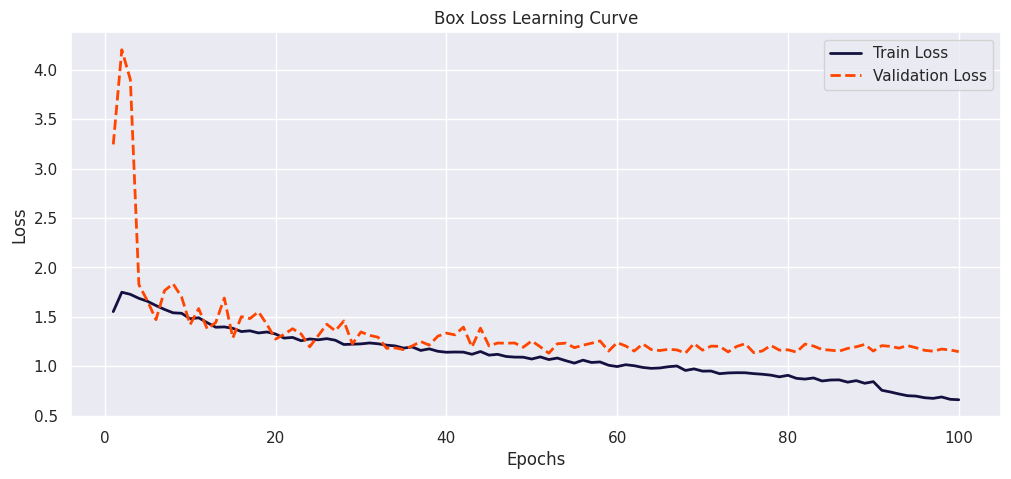

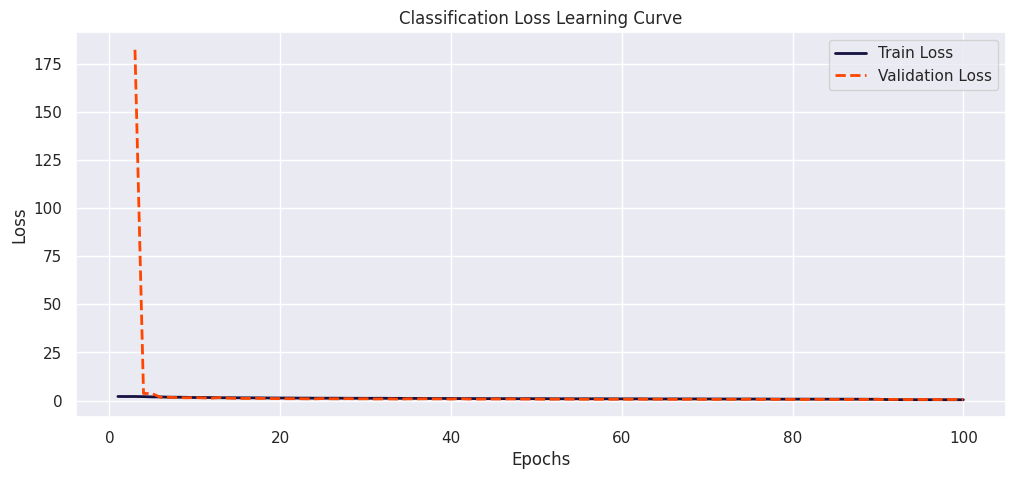

In [14]:

# Define the path to the directory
post_training_files_path = '/kaggle/working/runs/detect/train/'

# Define a function to plot learning curves for loss values
def plot_learning_curve(df, train_loss_col, val_loss_col, title):
    
    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df, x='epoch', y=train_loss_col, label='Train Loss', color='#141140', linestyle='-', linewidth=2)
    sns.lineplot(data=df, x='epoch', y=val_loss_col, label='Validation Loss', color='orangered', linestyle='--', linewidth=2)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
# Create the full file path for 'results.csv' using the directory path and file name
results_csv_path = os.path.join(post_training_files_path, 'results.csv')

# Load the CSV file from the constructed path into a pandas DataFrame
df = pd.read_csv(results_csv_path)

# Remove any leading whitespace from the column names
df.columns = df.columns.str.strip()

# Plot the learning curves for each loss
plot_learning_curve(df, 'train/box_loss', 'val/box_loss', 'Box Loss Learning Curve')
plot_learning_curve(df, 'train/cls_loss', 'val/cls_loss', 'Classification Loss Learning Curve')


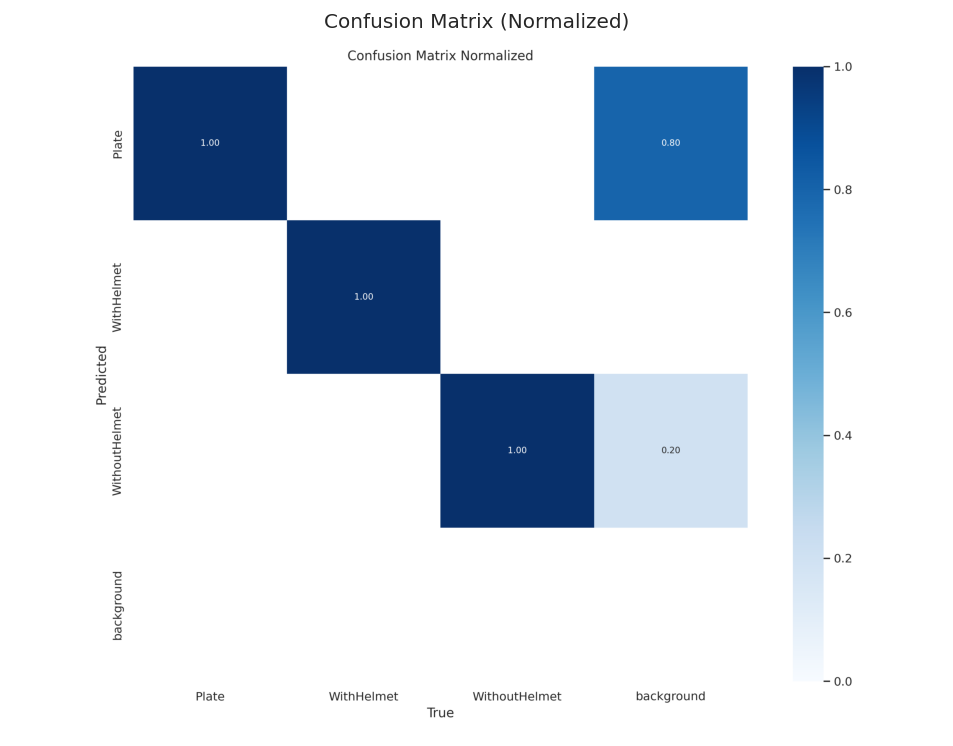

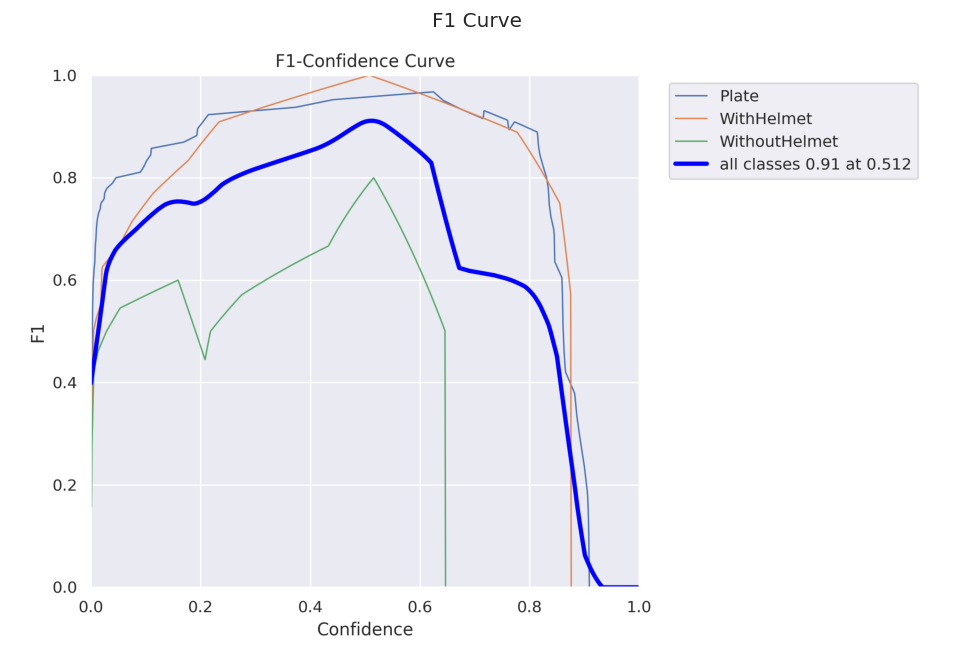

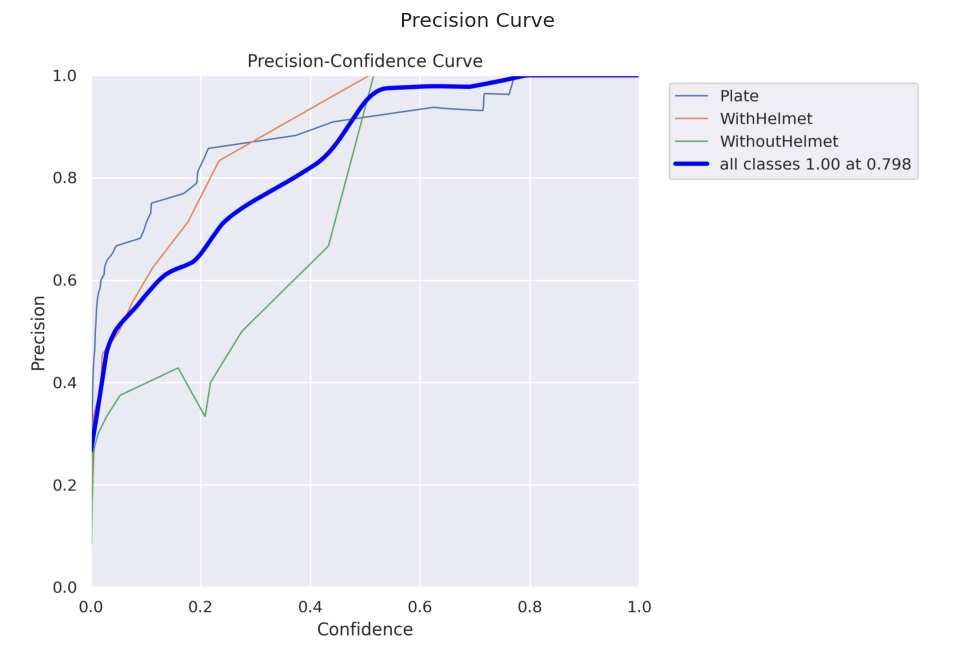

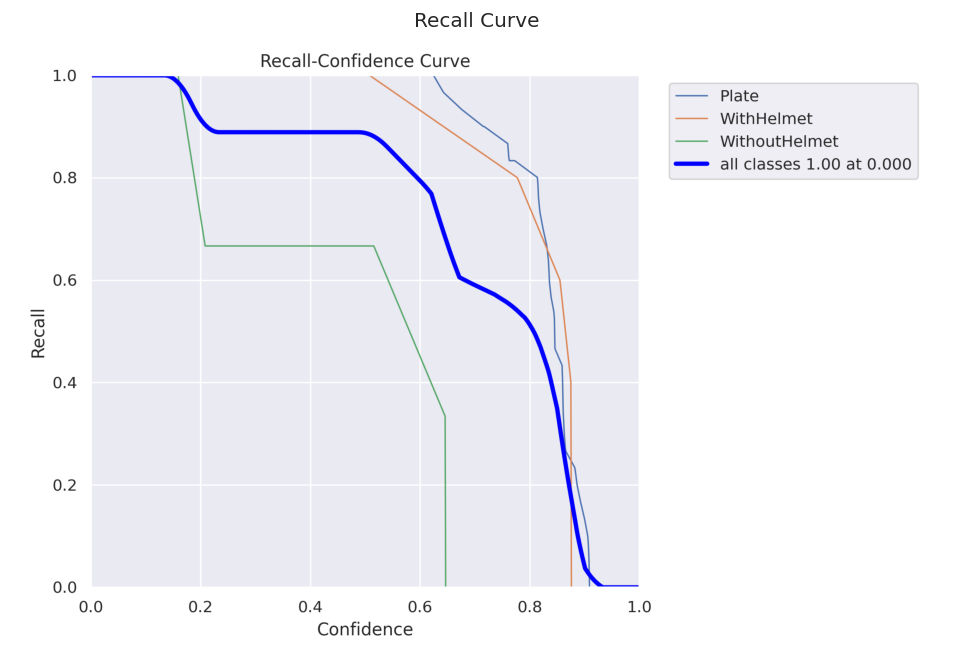

In [15]:
# Define the file names and their corresponding display titles
file_names = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png'
]

titles = [
    'Confusion Matrix (Normalized)',
    'F1 Curve',
    'Precision Curve',
    'Recall Curve'
]

# Loop through each file, process, and display the images
for file_name, title in zip(file_names, titles):
    # Construct the file path
    file_path = os.path.join(post_training_files_path, file_name)

    # Read the image using cv2
    img = cv2.imread(file_path)

    # Convert the image from BGR to RGB color space
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(10, 10), dpi=120)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''> |</span></b> Validation Model By ValSet</b></p>
</div>

In [16]:
# Construct the path to the best model weights file using os.path.join
best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# Load the best model weights into the YOLO model
best_model = YOLO(best_model_path )

# Validate the best model using the validation set with default parameters
metrics = best_model.val(split='val')
# Convert the dictionary to a pandas DataFrame and use the keys as the index
metrics_df = pd.DataFrame.from_dict(metrics.results_dict, orient='index', columns=['Metric Value'])

# Display the DataFram
metrics_df.round(3)

Ultralytics 8.3.49 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv9e summary (fused): 687 layers, 57,378,713 parameters, 0 gradients, 189.1 GFLOPs


val: Scanning /kaggle/input/helmet/HelmetViolationsV2/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<00:00, 355.22it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/helmet/HelmetViolationsV2/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.50s/it]


                   all         30         38      0.965      0.888      0.929      0.694
                 Plate         30         30       0.92          1      0.987      0.676
            WithHelmet          5          5          1      0.996      0.995      0.753
         WithoutHelmet          3          3      0.976      0.667      0.806      0.653
Speed: 0.2ms preprocess, 89.0ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val


Metric Value
metrics/precision(B)         0.965
metrics/recall(B)            0.888
metrics/mAP50(B)             0.929
metrics/mAP50-95(B)          0.694
fitness                      0.718

## <b>7 <span style='color:#e61227'>|</span> Inference on an Unseen Test Images </b>  


0: 640x640 1 Plate, 101.0ms
Speed: 2.9ms preprocess, 101.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 WithHelmet, 92.2ms
Speed: 1.7ms preprocess, 92.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 69.6ms
Speed: 1.5ms preprocess, 69.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 69.9ms
Speed: 1.6ms preprocess, 69.9ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 71.1ms
Speed: 1.5ms preprocess, 71.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 70.6ms
Speed: 1.6ms preprocess, 70.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 68.9ms
Speed: 1.7ms preprocess, 68.9ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Plate, 70.4ms
Speed: 1.6ms preprocess, 70.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640

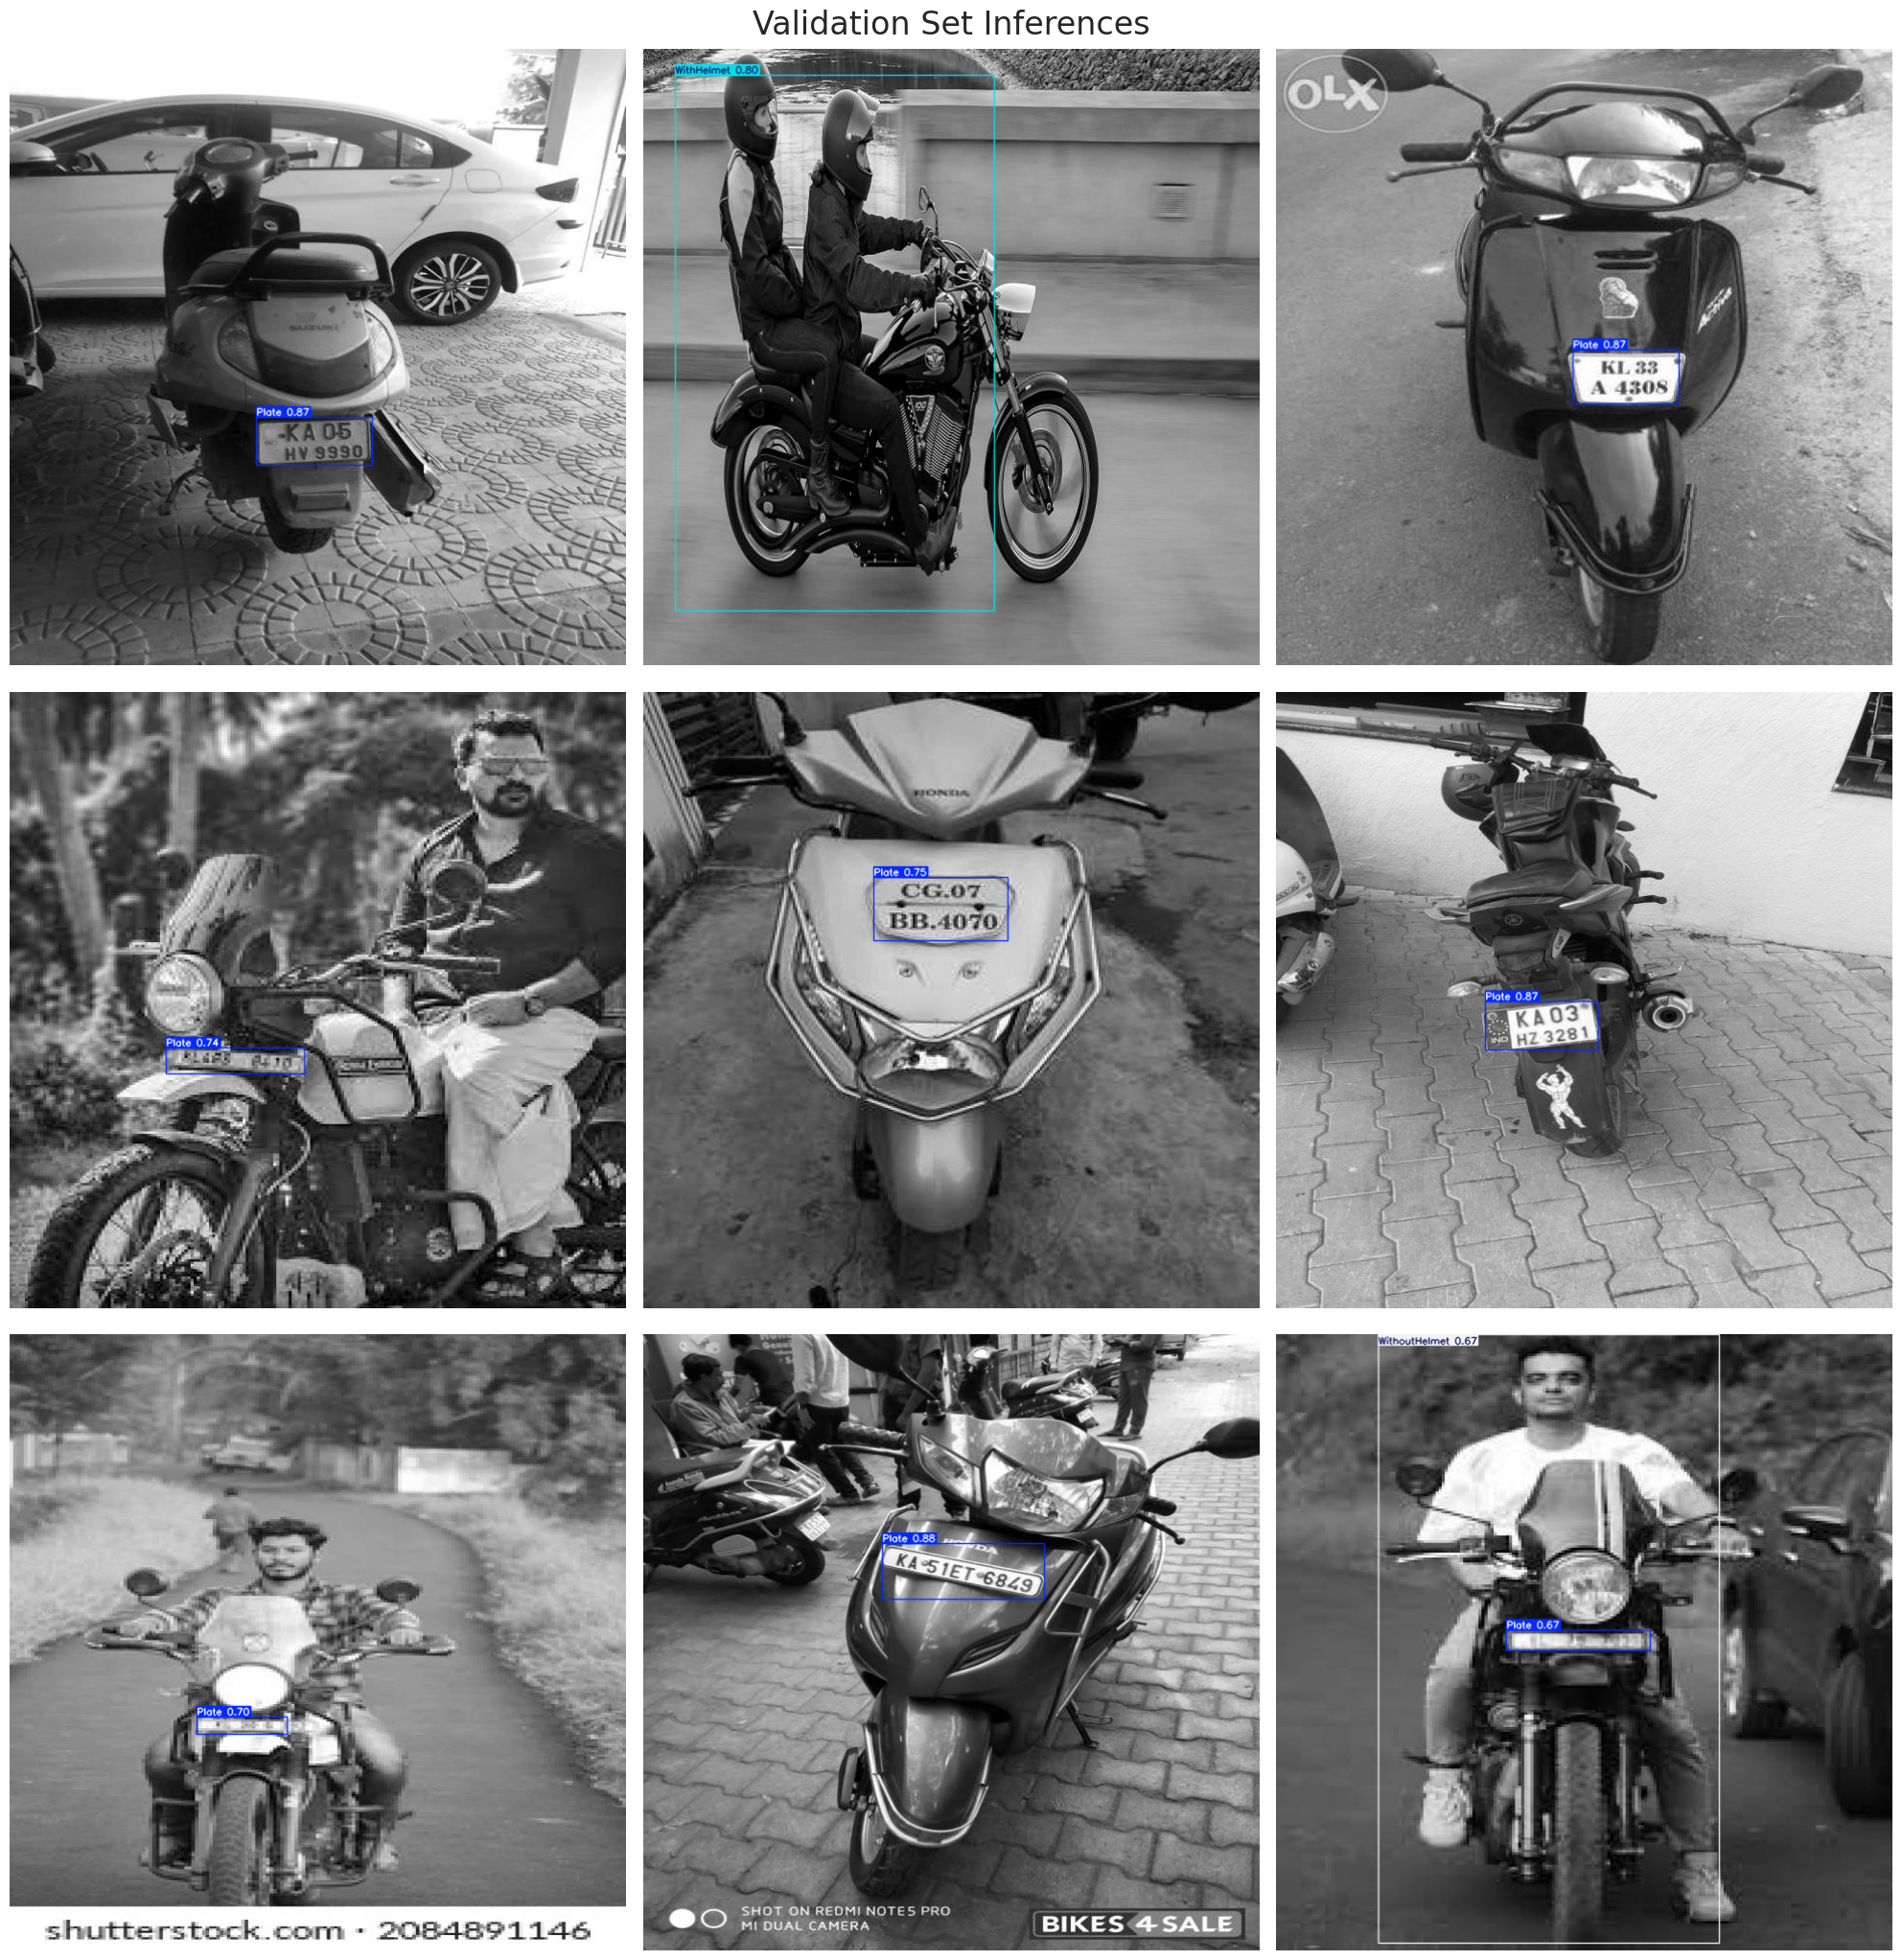

In [18]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = '/kaggle/input/helmet/HelmetViolationsV2'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 15)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = best_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

